<a href="https://colab.research.google.com/github/maskot1977/Computer_and_Exercises_2021/blob/Q5kCxB2w/%E8%AA%B2%E9%A1%8C%EF%BC%98%EF%BC%91%E3%80%9C%EF%BC%98%EF%BC%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題８１

In [ ]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

fx_observed = f(x_observed) # f(x) の観測値
gx_observed = g(x_observed) # g(x) の観測値
hx_observed = h(x_observed) # h(x) の観測値

In [ ]:
x_observed = np.linspace(-10, 10, 11) # 観測点
x_observed

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.])

In [ ]:
fx_observed

array([4.53978687e-05, 3.35350130e-04, 2.47262316e-03, 1.79862100e-02,
       1.19202922e-01, 5.00000000e-01, 8.80797078e-01, 9.82013790e-01,
       9.97527377e-01, 9.99664650e-01, 9.99954602e-01])

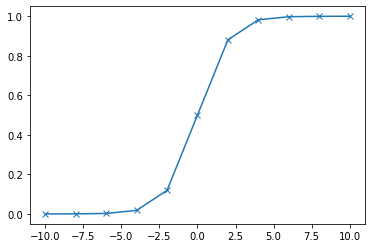

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_observed, fx_observed, marker="x")

In [ ]:
x_latent = np.linspace(-10, 10, 101)

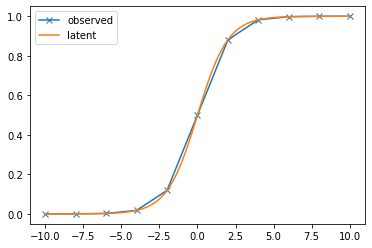

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_observed, fx_observed, marker="x", label="observed")
plt.plot(x_latent, f(x_latent), label="latent")
plt.legend()

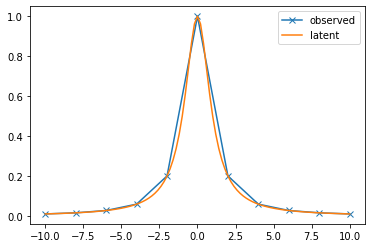

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_observed, gx_observed, marker="x", label="observed")
plt.plot(x_latent, g(x_latent), label="latent")
plt.legend()

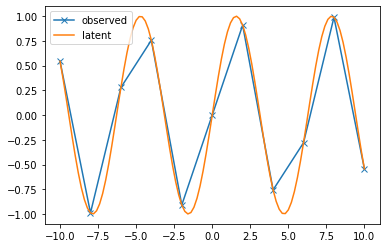

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_observed, hx_observed, marker="x", label="observed")
plt.plot(x_latent, h(x_latent), label="latent")
plt.legend()

In [ ]:
def get_coeff(i, x, x_observed):
    c = 1
    for j in range(len(x_observed)):
        if j != i:
            c *= (x - x_observed[j]) / (x_observed[i] - x_observed[j])
    return c

In [ ]:
def lagrange(x, x_observed, y_observed):
    sum = 0
    for i in range(len(x_observed)):
        sum += get_coeff(i, x, x_observed) * y_observed[i]
    return sum

In [ ]:
lagrange(0.5, x_observed, fx_observed)

0.6125216643857131

In [ ]:
lagrange([0.5, 1, 1.5], x_observed, fx_observed)

array([0.61252166, 0.71752066, 0.8084858 ])

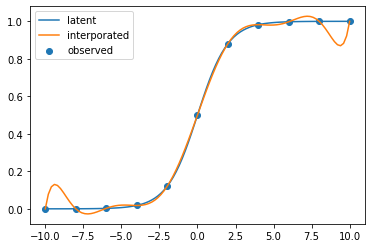

In [ ]:
plt.scatter(x_observed, fx_observed, label="observed")
plt.plot(x_latent, f(x_latent), label="latent")
plt.plot(x_latent, lagrange(x_latent, x_observed, fx_observed), label="interporated")
plt.legend()

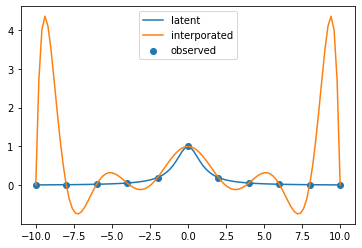

In [ ]:
plt.scatter(x_observed, gx_observed, label="observed")
plt.plot(x_latent, g(x_latent), label="latent")
plt.plot(x_latent, lagrange(x_latent, x_observed, gx_observed), label="interporated")
plt.legend()

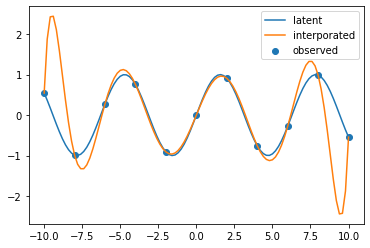

In [ ]:
plt.scatter(x_observed, hx_observed, label="observed")
plt.plot(x_latent, h(x_latent), label="latent")
plt.plot(x_latent, lagrange(x_latent, x_observed, hx_observed), label="interporated")
plt.legend()

# 課題８２

In [ ]:
def spline(x_latent, x_observed, y_observed):
    n = len(x_observed) - 1 # 何個の3次式を定義するか
    A = np.zeros((4 * n, 4 * n))
    b = np.zeros(4 * n)
    for i in range(n - 1):
        A[4 * i][4 * i + 0] = x_observed[i] ** 3
        A[4 * i][4 * i + 1] = x_observed[i] ** 2
        A[4 * i][4 * i + 2] = x_observed[i] 
        A[4 * i][4 * i + 3] = 1
        b[4 * i] = y_observed[i]

        A[4 * i + 1][4 * i + 0] = x_observed[i + 1] ** 3
        A[4 * i + 1][4 * i + 1] = x_observed[i + 1] ** 2
        A[4 * i + 1][4 * i + 2] = x_observed[i + 1] 
        A[4 * i + 1][4 * i + 3] = 1
        b[4 * i + 1] = y_observed[i + 1]

        A[4 * i + 2][4 * i + 0] = 3 * x_observed[i + 1] ** 2
        A[4 * i + 2][4 * i + 1] = 2 * x_observed[i + 1] 
        A[4 * i + 2][4 * i + 2] = 1
        A[4 * i + 2][4 * i + 4] = -3 * x_observed[i + 1] ** 2
        A[4 * i + 2][4 * i + 5] = -2 * x_observed[i + 1] 
        A[4 * i + 2][4 * i + 6] = -1

        A[4 * i + 3][4 * i + 0] = 6 * x_observed[i + 1] 
        A[4 * i + 3][4 * i + 1] = 2
        A[4 * i + 3][4 * i + 4] = -6 * x_observed[i + 1] 
        A[4 * i + 3][4 * i + 5] = -2

    A[4 * n - 4][4 * n - 4] = x_observed[n - 1] ** 3 
    A[4 * n - 4][4 * n - 3] = x_observed[n - 1] ** 2 
    A[4 * n - 4][4 * n - 2] = x_observed[n - 1]
    A[4 * n - 4][4 * n - 1] = 1
    b[4 * n - 4] = y_observed[n - 1]

    A[4 * n - 3][4 * n - 4] = x_observed[n] ** 3 
    A[4 * n - 3][4 * n - 3] = x_observed[n] ** 2 
    A[4 * n - 3][4 * n - 2] = x_observed[n]
    A[4 * n - 3][4 * n - 1] = 1
    b[4 * n - 3] = y_observed[n]

    A[4 * n - 2][0] = 6 * x_observed[0]
    A[4 * n - 2][1] = 2

    A[4 * n - 1][4 * n - 4] = 6 * x_observed[n]
    A[4 * n - 1][4 * n - 3] = 2

    coeff = np.linalg.solve(A, b)

    interpolated = []
    for x in x_latent:
        for j in range(len(x_observed - 1)):
            if x_observed[j] <= x and x <= x_observed[j + 1]:
                a = coeff[4 * j]
                b = coeff[4 * j + 1]
                c = coeff[4 * j + 2]
                d = coeff[4 * j + 3]
                y = a * x**3 + b * x**2 + c * x + d
                interpolated.append(y)
                break

    return interpolated

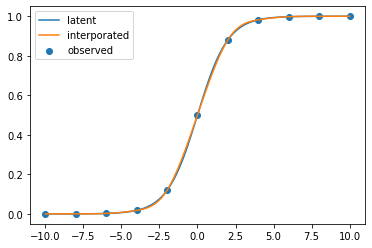

In [ ]:
plt.scatter(x_observed, fx_observed, label="observed")
plt.plot(x_latent, f(x_latent), label="latent")
plt.plot(x_latent, spline(x_latent, x_observed, fx_observed), label="interporated")
plt.legend()

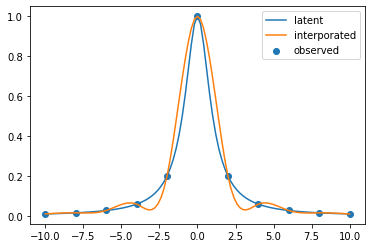

In [ ]:
plt.scatter(x_observed, gx_observed, label="observed")
plt.plot(x_latent, g(x_latent), label="latent")
plt.plot(x_latent, spline(x_latent, x_observed, gx_observed), label="interporated")
plt.legend()

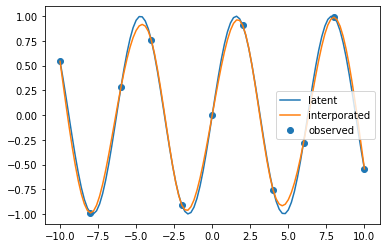

In [ ]:
plt.scatter(x_observed, hx_observed, label="observed")
plt.plot(x_latent, h(x_latent), label="latent")
plt.plot(x_latent, spline(x_latent, x_observed, hx_observed), label="interporated")
plt.legend()

# 課題８３

In [ ]:
f2 = lambda x: x**3 + 2 * x**2 - 6 * x + 4

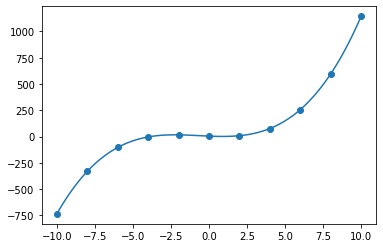

In [ ]:
plt.scatter(x_observed, f2(x_observed), label="observed")
plt.plot(x_latent, f2(x_latent), label="latent")

In [ ]:
x_ones = np.ones(len(x_observed))
x_ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
x_observed * x_ones

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.])

In [ ]:
d = 3
x_tmp = x_ones
X_tmp = [x_tmp]
for i in range(d):
    x_tmp = x_observed * x_tmp
    X_tmp.append(x_tmp)

X_tmp = np.matrix(X_tmp)
X_tmp

matrix([[    1.,     1.,     1.,     1.,     1.,     1.,     1.,     1.,
             1.,     1.,     1.],
        [  -10.,    -8.,    -6.,    -4.,    -2.,     0.,     2.,     4.,
             6.,     8.,    10.],
        [  100.,    64.,    36.,    16.,     4.,     0.,     4.,    16.,
            36.,    64.,   100.],
        [-1000.,  -512.,  -216.,   -64.,    -8.,     0.,     8.,    64.,
           216.,   512.,  1000.]])

In [ ]:
S = X_tmp * X_tmp.T
S

matrix([[1.10000e+01, 0.00000e+00, 4.40000e+02, 0.00000e+00],
        [0.00000e+00, 4.40000e+02, 0.00000e+00, 3.13280e+04],
        [4.40000e+02, 0.00000e+00, 3.13280e+04, 0.00000e+00],
        [0.00000e+00, 3.13280e+04, 0.00000e+00, 2.62592e+06]])

In [ ]:
T = X_tmp @ f2(x_observed).reshape(len(x_observed), 1)

In [ ]:
np.linalg.solve(S, T)

matrix([[ 4.],
        [-6.],
        [ 2.],
        [ 1.]])

In [ ]:
f2(x_observed).reshape(len(x_observed), 1)

array([[-736.],
       [-332.],
       [-104.],
       [  -4.],
       [  16.],
       [   4.],
       [   8.],
       [  76.],
       [ 256.],
       [ 596.],
       [1144.]])

In [ ]:
import numpy as np
def get_coeff_poly(x_observed, y_observed, d=3):
    x_ones = np.ones(len(x_observed))
    x_tmp = x_ones
    X_tmp = [x_tmp]
    for i in range(d):
        x_tmp = x_observed * x_tmp
        X_tmp.append(x_tmp)

    X_tmp = np.matrix(X_tmp)
    S = X_tmp * X_tmp.T
    T = X_tmp @ y_observed.reshape(len(x_observed), 1)
    return np.linalg.solve(S, T).reshape(1, d + 1).A1

In [ ]:
get_coeff_poly(x_observed, f(x_observed), d=4)

array([ 5.00000000e-01,  1.19807394e-01,  4.12367493e-18, -7.46038675e-04,
       -4.12367493e-20])

In [ ]:
def fit_polynominal(coeff, x_latent):
    y = 0
    for i in range(len(coeff)):
        y += coeff[i] * pow(x_latent, i)
    return y

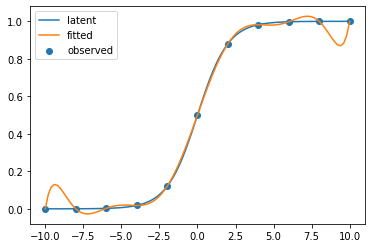

In [ ]:
coeff = get_coeff_poly(x_observed, fx_observed, d=10)
y_pred = fit_polynominal(coeff, x_latent)

plt.scatter(x_observed, fx_observed, label="observed")
plt.plot(x_latent, f(x_latent), label="latent")
plt.plot(x_latent, y_pred, label="fitted")
plt.legend()

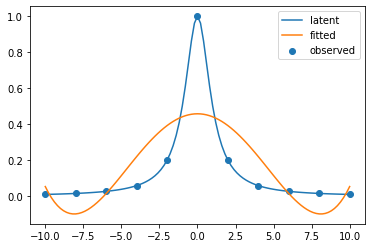

In [ ]:
coeff = get_coeff_poly(x_observed, gx_observed, d=4)
y_pred = fit_polynominal(coeff, x_latent)

plt.scatter(x_observed, gx_observed, label="observed")
plt.plot(x_latent, g(x_latent), label="latent")
plt.plot(x_latent, y_pred, label="fitted")
plt.legend()

In [ ]:
y_observed = np.array([6, 16, 17, 16, 10, 8, 1, 0, 2, 8, 19])

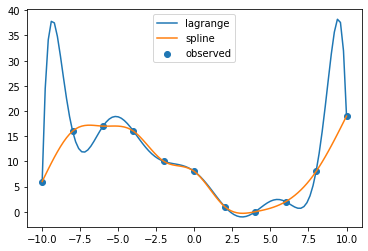

In [ ]:
plt.scatter(x_observed, y_observed, label="observed")
plt.plot(x_latent, lagrange(x_latent, x_observed, y_observed), label="lagrange")
plt.plot(x_latent, spline(x_latent, x_observed, y_observed), label="spline")
plt.legend()

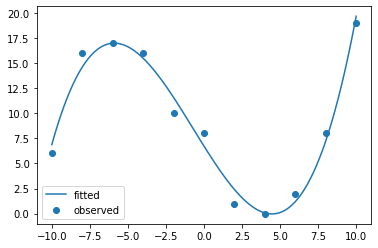

In [ ]:
coeff = get_coeff_poly(x_observed, y_observed, d=3)
y_pred = fit_polynominal(coeff, x_latent)

plt.scatter(x_observed, y_observed, label="observed")
plt.plot(x_latent, y_pred, label="fitted")
plt.legend()

# 課題８４

In [ ]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 27.9 MB/s 


In [ ]:
import pulp

prob = pulp.LpProblem(name='A_simple_Linear_Programming', sense=pulp.LpMaximize)

In [ ]:
x = pulp.LpVariable('x', lowBound = 0)
y = pulp.LpVariable('y', lowBound = 0)

In [ ]:
prob += x + y

In [ ]:
prob += x + 2 * y <= 6
prob += 2 * x + y <= 6

In [ ]:
prob

A_simple_Linear_Programming:
MAXIMIZE
1*x + 1*y + 0
SUBJECT TO
_C1: x + 2 y <= 6

_C2: 2 x + y <= 6

VARIABLES
x Continuous
y Continuous

In [ ]:
status = prob.solve()

In [ ]:
pulp.LpStatus[status]

'Optimal'

In [ ]:
print("Optimal x=", x.value())
print("Optimal y=", y.value())
print("Optimal z=", prob.objective.value())

Optimal x= 2.0
Optimal y= 2.0
Optimal z= 4.0


In [ ]:
import pulp

prob = pulp.LpProblem(name='A_simple_Linear_Programming', sense=pulp.LpMinimize)

In [ ]:
a = pulp.LpVariable('a', lowBound = 0)
b = pulp.LpVariable('b', lowBound = 0)
c = pulp.LpVariable('c', lowBound = 0)

In [ ]:
prob += 40 * a + 20 * b + 50 * c

In [ ]:
prob += 3 * a + 1 * b + 2 * c >= 15

In [ ]:
prob += 1 * a + 2 * b + 4 * c >= 10

In [ ]:
prob

A_simple_Linear_Programming:
MINIMIZE
40*a + 20*b + 50*c + 0
SUBJECT TO
_C1: 3 a + b + 2 c >= 15

_C2: a + 2 b + 4 c >= 10

VARIABLES
a Continuous
b Continuous
c Continuous

In [ ]:
status = prob.solve()

In [ ]:
pulp.LpStatus[status]

'Optimal'

In [ ]:
print("Optimal a=", a.value())
print("Optimal b=", b.value())
print("Optimal c=", c.value())
print("Optimal z=", prob.objective.value())

Optimal a= 4.0
Optimal b= 3.0
Optimal c= 0.0
Optimal z= 220.0


# 84-2

In [ ]:
n =  20
a =  [-36, 52, 24, 64, 16, -10, -44, 93, -37, -86, 100, 55, 77, -11, -62, 16, -14, -2, -57, 47]
m =  -83

In [ ]:
import pulp

prob = pulp.LpProblem(name='A_simple_Linear_Programming', sense=pulp.LpMinimize)
vs = [pulp.LpVariable('a{}'.format(x), cat='Binary') for x in range(len(a))]
prob += pulp.lpDot(vs, a) == m
status = prob.solve()
if pulp.LpStatus[status] == 'Optimal':
    print(True)
    print([vs[i].value() for i in range(len(a))])
else:
    print(False)

True
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]


In [ ]:
n =  20
a =  [-7711, -4112, -1207, -2950, -4434, 2544, -5463, -1524, -8374, -9426, -1934, -2191, -8625, 7108, -7383, 4248, -930, 1616, -8065, -7854]
m =  -2009

In [ ]:
import pulp

prob = pulp.LpProblem(name='A_simple_Linear_Programming', sense=pulp.LpMinimize)
vs = [pulp.LpVariable('a{}'.format(x), cat='Binary') for x in range(len(a))]
prob += pulp.lpDot(vs, a) == m
status = prob.solve()
if pulp.LpStatus[status] == 'Optimal':
    print(True)
    print([vs[i].value() for i in range(len(a))])
else:
    print(False)

False


# 課題８５

In [ ]:
n =  5
G = \
[[0, 0, 0, 0, 1],
 [0, 0, 0, 1, 1],
 [0, 0, 0, 1, 0],
 [0, 1, 1, 0, 1],
 [1, 1, 0, 1, 0]]

In [ ]:
import copy
def task85(G):
    longest_cycle = []
    for i in range(len(G)):
        queue = []
        for j in range(len(G)):
            if G[i][j] == 1: # 隣接している
                queue.append([i, j])

    while len(queue) > 0:
        path = queue.pop()
        for j in range(len(G)):
            if G[path[-1]][j] == 1: # 隣接している
                new_path = copy.deepcopy(path)
                if j in new_path: # 既存の点に戻ってきた時
                        if j == new_path[0] and len(new_path) > 2: # 長さ３以上のサイクルが見つかった時
                            if len(longest_cycle) < len(new_path): # 最長のサイクルが見つかった時
                                longest_cycle = new_path
                else: # 既存の点ではなかったとき
                    new_path.append(j)
                    queue.append(new_path)

    return longest_cycle

task85(G)

[4, 3, 1]

In [ ]:
n =  8
G = \
[[0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0]]

task85(G)

[]

In [ ]:
n =  10
G = \
[[0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 1, 0, 0, 1, 0, 0, 0]]

task85(G)

[9, 3, 7, 8, 1, 0]

# 課題８６

In [ ]:
n =  5
G = \
[[0, 0, 1, 0, 1],
 [0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 0, 0, 1],
 [1, 0, 0, 1, 0]]

In [ ]:
import copy

def task86(G):
    colors = {}
    for i in range(len(G)):
        if i in colors.keys():
            continue
        
        colors[i] = 0 # ゼロ＝たとえば黒
        queue = []
        for j in range(len(G)):
            if G[i][j] == 1: #隣接している時
                #if j in colors.keys(): # 隣接しているノードにすでに色がついていた時
                #    if colors[j] == colors[i]: # 隣接しているノードの色が同じ時
                #        return False

                colors[j] = 1 # たとえば白
                queue.append([i, j])

        while len(queue) > 0:
            path = queue.pop(0)
            for j in range(len(G)):
                if G[path[-1]][j] == 1: # 隣接している
                    if j in colors.keys(): # 隣接しているノードにすでに色がついていた時
                        if colors[j] == colors[path[-1]]: # 隣接しているノードの色が同じ時
                            return False
                        elif colors[path[-1]] == 1: #最後のノードが白の時
                            colors[j] = 0 # 次のノードは黒
                        else:
                            colors[j] = 1 # そうでなければ白

                        new_path = copy.deepcopy(path)
                        if j not in new_path:
                            new_path.append(j)
                            queue.append(new_path)
    return True

In [ ]:
n =  5
G = \
[[0, 0, 1, 0, 1],
 [0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 0, 0, 1],
 [1, 0, 0, 1, 0]]

task86(G)

False

In [ ]:
n =  5
G = \
[[0, 1, 0, 0, 0],
 [1, 0, 0, 1, 1],
 [0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1],
 [0, 1, 0, 1, 0]]

task86(G)

False

In [ ]:
n =  8
G = \
[[0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0]]

task86(G)

False

# 課題８７

In [ ]:
!wget https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/location.txt 

--2021-12-23 09:26:17--  https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/location.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1251 (1.2K) [text/plain]
Saving to: ‘location.txt’

location.txt        100%[===================>]   1.22K  --.-KB/s    in 0s      

2021-12-23 09:26:17 (33.5 MB/s) - ‘location.txt’ saved [1251/1251]



In [ ]:
import pandas as pd
